In [113]:
#!pip install plotly
#!pip install imblearn

In [121]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import seaborn as sns
import scipy.stats as ss
import os
import squarify
import plotly
import plotly.plotly as py


In [88]:
#define visualization functions
def drawPie(category,pctpos, anexplode):
    PieCount=pd.DataFrame(Evansville_Dicipline_Data[str(category)].value_counts()).reset_index()
    PieCount[str(category)].plot.pie( subplots=True, colormap='Set3', autopct='%.2f%%', fontsize=11, figsize=(10,10),legend=True, labels=None, title=False, pctdistance=pctpos,explode=anexplode, textprops={'fontsize': 16})
    plt.legend(loc=4,labels=PieCount['index'], borderpad=-1.3)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig('pie'+category+'.png', bbox_inches = "tight")
    #plt.show()    
def drawTreemap(category):
    plt.figure(figsize=(16,10))
    treeCount=pd.DataFrame(Evansville_Dicipline_Data[str(category)].value_counts()).reset_index()
    labels=['Academy of \nInnovative Studies \n(1871)', 'Evans Middle School \n(347)', 'William Henry \nHarrison High School \n(321)']
    squarify.plot(sizes=treeCount[str(category)], label=list(labels)[:3], alpha=.8)
    plt.axis('off')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig('treemap'+category+'.png', bbox_inches = "tight")
    plt.show()
    
def drawHist(category, xytext):
    plt.figure(figsize=(16,10))
    sns.set(style='whitegrid')
    histVal=sns.countplot(x=category, data=Evansville_Dicipline_Data)
    plt.xticks(fontsize=13,rotation=90)
    plt.yticks(fontsize=13)
    for p in histVal.patches:
        histVal.annotate(round(p.get_height()),((p.get_x() + p.get_width()), p.get_height()+10), xytext=xytext, fontsize=14,color='#000000',textcoords='offset points')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig('hist'+category+'.png', bbox_inches = "tight")
    plt.show()
    
def vBarChart(df, hue, category,xytext):
    plt.figure(figsize=(16,10))
    sns.set(style='darkgrid')
    barCount = sns.countplot(x=str(category),hue=hue, data=df[df[str(category)]!=0])
    plt.xticks(fontsize=13,rotation=90)
    plt.yticks(fontsize=13)    
    for p in barCount.patches:
        barCount.annotate(round(p.get_height()),((p.get_x() + p.get_width()), p.get_height()+10), xytext=xytext, fontsize=14,color='#000000',textcoords='offset points')
    if hue ==None:
        plt.savefig('vBar'+category+'.png', bbox_inches = "tight")
    else:
        plt.savefig('vBar'+category+'_'+'.png', bbox_inches = "tight")
        
    plt.show()

def OtherVsDis(cat1,loc):
    plt.figure(figsize=(16,10))
    df1 = pd.concat([evscData['Disciplinary Action'], Evansville_Dicipline_Data[str(cat1)]], axis=1)
    sns.set(style='darkgrid')
    eVd = sns.countplot(x='Disciplinary Action',hue=str(cat1), data=df1[df1!=0])
    plt.legend(loc=loc)
    for p in eVd.patches:
        eVd.annotate(round(p.get_height()),((p.get_x() + p.get_width()), p.get_height()+10), xytext=(-30,5), fontsize=14,color='#000000',textcoords='offset points')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig('vBar'+cat1+'vsDisciplinary_Action'+'.png', bbox_inches = "tight")
    plt.show()
    
def hBarChart(df, category):
    plt.figure(figsize=(16,10))
    sns.set(style='darkgrid')
    barCount = sns.countplot(y=str(category), data=df[df[str(category)]!=0])
    #plt.xticks(rotation=90)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)    
    for p in barCount.patches:
        barCount.annotate(p.get_width(),((p.get_x() + p.get_width()), p.get_y()), xytext=(3, -9), fontsize=11,color='#000000',textcoords='offset points')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig('hBar'+category+'.png', bbox_inches = "tight")
    plt.show()
        
#Source: https://github.com/shakedzy/dython/blob/master/dython/nominal.py
def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    :return: float
        in the range of [0,1]
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    print(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))))
    
#Source: https://github.com/shakedzy/dython/blob/master/dython/nominal.py 
def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,return_results = False, **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and
    continuous features using:
     - Pearson's R for continuous-continuous cases
     - Correlation Ratio for categorical-continuous cases
     - Cramer's V or Theil's U for categorical-categorical cases
    :param dataset: NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    :param nominal_columns: string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can also be the string 'all' to state that all
        columns are categorical, or None (default) to state none are categorical
    :param mark_columns: Boolean (default: False)
        if True, output's columns' names will have a suffix of '(nom)' or '(con)' based on there type (eda_tools or
        continuous), as provided by nominal_columns
    :param theil_u: Boolean (default: False)
        In the case of categorical-categorical feaures, use Theil's U instead of Cramer's V
    :param plot: Boolean (default: True)
        If True, plot a heat-map of the correlation matrix
    :param return_results: Boolean (default: False)
        If True, the function will return a Pandas DataFrame of the computed associations
    :param kwargs:
        Arguments to be passed to used function and methods
    :return: Pandas DataFrame
        A DataFrame of the correlation/strength-of-association between all features
    """

    dataset = pd.DataFrame(dataset)
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(55,55))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'))
        plt.show()
    if return_results:
        return corr


In [89]:
##Import Data
Evansville_Dicipline_Data=pd.read_excel('/Users/manoahf/Desktop/Capstone/Evansville_Discipline_ES_Collection Data_2.18.2018.xlsx')
##Preprocessing

#School Year, School ID, Student Unique Identifier, and Arrest On/Off were dropped from the dataset immediately
Evansville_Dicipline_Data = Evansville_Dicipline_Data.drop(['School Year', 'School ID', 'Student Unique Identifier','Arrest On/Off'], axis=1)

#fill null values with zero
Evansville_Dicipline_Data = Evansville_Dicipline_Data[pd.notnull(Evansville_Dicipline_Data['School Name'])]
Evansville_Dicipline_Data['Arrest Reason'] = Evansville_Dicipline_Data['Arrest Reason'].fillna(0)
Evansville_Dicipline_Data['Primary Exceptionality'] = Evansville_Dicipline_Data['Primary Exceptionality'].fillna(0)
#Evansville_Dicipline_Data['Arrest On/Off'] = Evansville_Dicipline_Data['Arrest On/Off'].fillna(0)
#Replace encoded data with variable description
Evansville_Dicipline_Data['Primary Exceptionality'] = Evansville_Dicipline_Data['Primary Exceptionality'].replace({1.0:"Multiple Disabilities", 2.0: "Orthopedic Impariment", 3.0:"Blind or Low Vison", 4.0: "Deaf or Hard of Hearing", 5.0:"Emotional Disability(Full Time)", 6.0:"Emotional Disability",7.0:"Specific Learning Disability", 8.0: "Developmental Delay(Ages 3-5A only)", 9.0:"language or Speech Impairment", 10.0:"Mild Cognitive Disability", 11.0:"Moderate Congnitive Disability", 12.0:"Severe Cognitive Disability", 14.0:"Deaf-blind", 15.0:"Autism spectrum disorder", 16.0:"Traumatic brain injury", 17.0:"Other health impairment"})
Evansville_Dicipline_Data['Arrest Reason'] = Evansville_Dicipline_Data['Arrest Reason']. replace({122.0:"Battery",125.0:"Battery Resultion in Bodily Injury", 162.0:"Dealing in a Schedule I Controlled Substance", 170.0:"Dealing in Marijuana", 174.0:"Disorderly Conduct", 213.0:"Intimidation", 250.0:"Possession of a Controlled Substance", 253.0:"Possession of a Knife on School Property/Bus", 255.0:"Possion of a Narcotic Drug", 263.0:"Possession of Cocaine or Narcotic Drug", 270.0:"Possession of Marijuana", 294.0:"Resisting Law Enforcement", 306.0:"Theft", 307.0:"Trespass"})

#Encode categorical variables by creating dummy variables for standardization and encoding ordinal data
grade_mapping = {
    '12':12,'11':11,'10':10,'09':9,
    '08':8,'07':7,'06':6,'05':5,'04':4,
    '03':3,'02':2,'01':1,'KG':0}

Evansville_Dicipline_Data['Grade'] = Evansville_Dicipline_Data['Grade'].map(grade_mapping)

oriColNames = list(Evansville_Dicipline_Data.columns)

Evansville_Dicipline_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6232 entries, 0 to 6232
Data columns (total 9 columns):
School Name               6232 non-null object
Grade                     6232 non-null int64
FRL                       6232 non-null object
Ethnicity                 6232 non-null object
Gender                    6232 non-null object
Primary Exceptionality    6232 non-null object
ES Type                   6232 non-null object
ES Reason                 6232 non-null object
Arrest Reason             6232 non-null object
dtypes: int64(1), object(8)
memory usage: 486.9+ KB


In [90]:
Evansville_Dicipline_Data["Primary Exceptionality"].unique()

array([0.0, 'Autism spectrum disorder', 'Specific Learning Disability',
       'Emotional Disability', 'language or Speech Impairment',
       'Other health impairment', 'Emotional Disability(Full Time)',
       'Mild Cognitive Disability', 'Multiple Disabilities',
       'Traumatic brain injury', 'Deaf or Hard of Hearing',
       'Moderate Congnitive Disability', 'Blind or Low Vison',
       'Orthopedic Impariment'], dtype=object)

In [91]:
#drawTreemap('School Name')


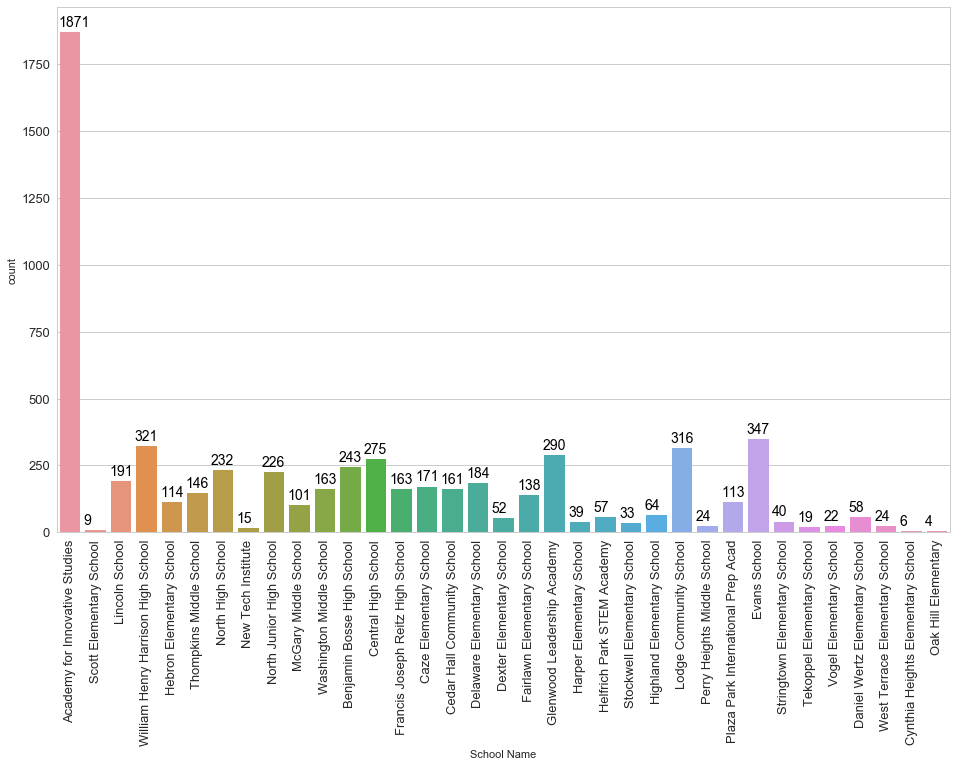

In [92]:
drawHist('School Name',(-22,3))


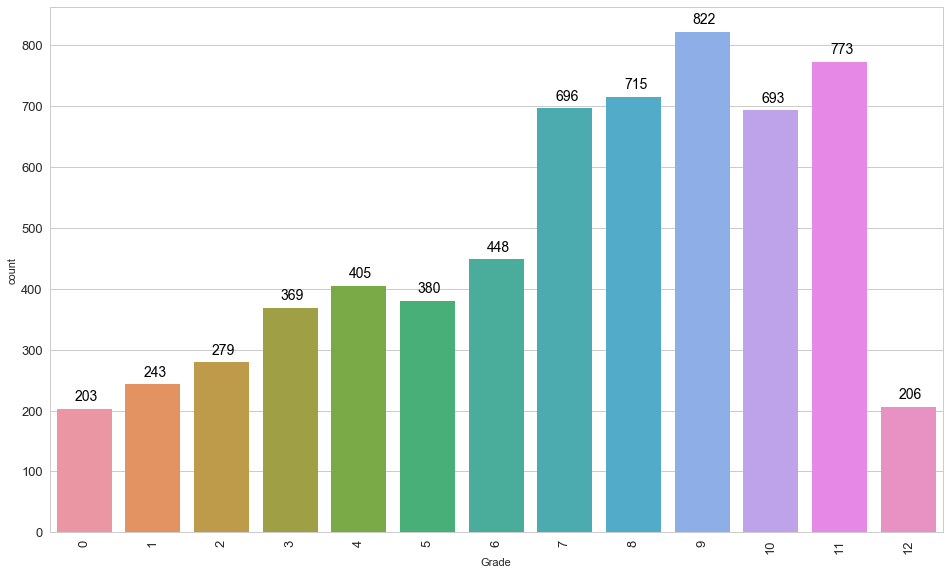

In [93]:
drawHist('Grade',(-37,2))

No handles with labels found to put in legend.


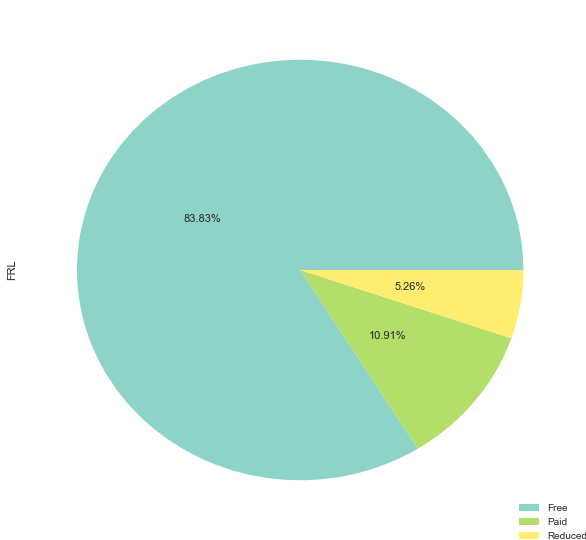

In [94]:
drawPie('FRL', .5, (0,0,0))


No handles with labels found to put in legend.


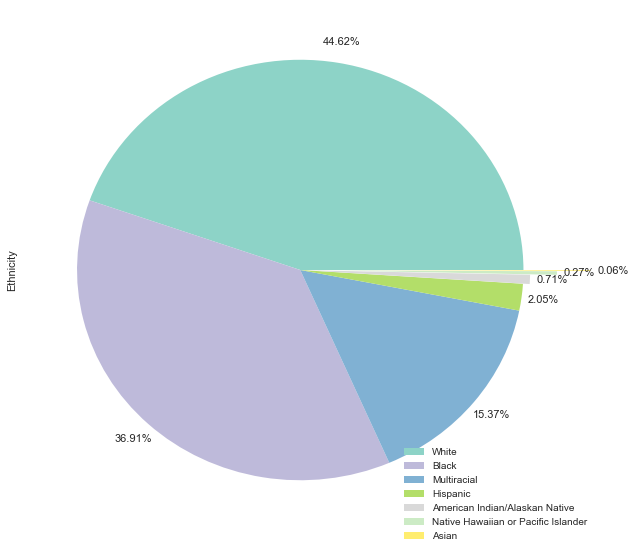

In [95]:
drawPie('Ethnicity', 1.1, (0,0,0,0,.03,.15,.3))


In [11]:
#Correlation-School Name, Grade, and Gender
evscCorrData = pd.get_dummies(Evansville_Dicipline_Data[['Ethnicity','FRL', 'Primary Exceptionality','ES Reason', 'Arrest Reason']])

#Introduce Arrest Made column that will serve as a target variable
def arrest_made(row):
    if row['Arrest Reason']!=0:
        return 1
    return 0
#get separate dataframe of dummy variables for Discipline type
evscDisTypeCorr = pd.get_dummies(Evansville_Dicipline_Data[['ES Type']])

evscDisTypeCorr['Arrest Made']=Evansville_Dicipline_Data.apply(lambda row: arrest_made(row), axis=1)


evscDataC = evscCorrData

#Create Target Vector(Disciplinary Action) from existing variables concerning type of event
def disciplinary_action(row):
    if row['ES Type_Event involving Arrest, Bullying, Gang Not Involving Susp/Expul']==1:
        return 2 #Event involving Arrest, Bullying, Gang Not Involving Susp/Expul
    if row['ES Type_Expulsion']==1:
        return 1 #Expulsion
    if row['ES Type_Out-Of-School Susp']+row['Arrest Made']>1:
        return 2 #Arrest
    if row['ES Type_Out-Of-School Susp']==1:
        return 0 #Out-Of-School Suspension
    return 0

evscDisTypeCorr['Disciplinary Action'] = evscDisTypeCorr.apply(lambda row: disciplinary_action(row), axis=1)
evscDataC['Disciplinary Action'] = pd.DataFrame(evscDisTypeCorr['Disciplinary Action'])
#Evansville_Dicipline_Data = Evansville_Dicipline_Data.drop(['ES Type_Event involving Arrest, Bullying, Gang Not Involving Susp/Expul', 'ES Type_Expulsion', 'ES Type_Out-Of-School Susp', 'Arrest Made', 'Gender_F'], axis=1)
newColNamesC = list(evscDataC.columns)
#evscDataC


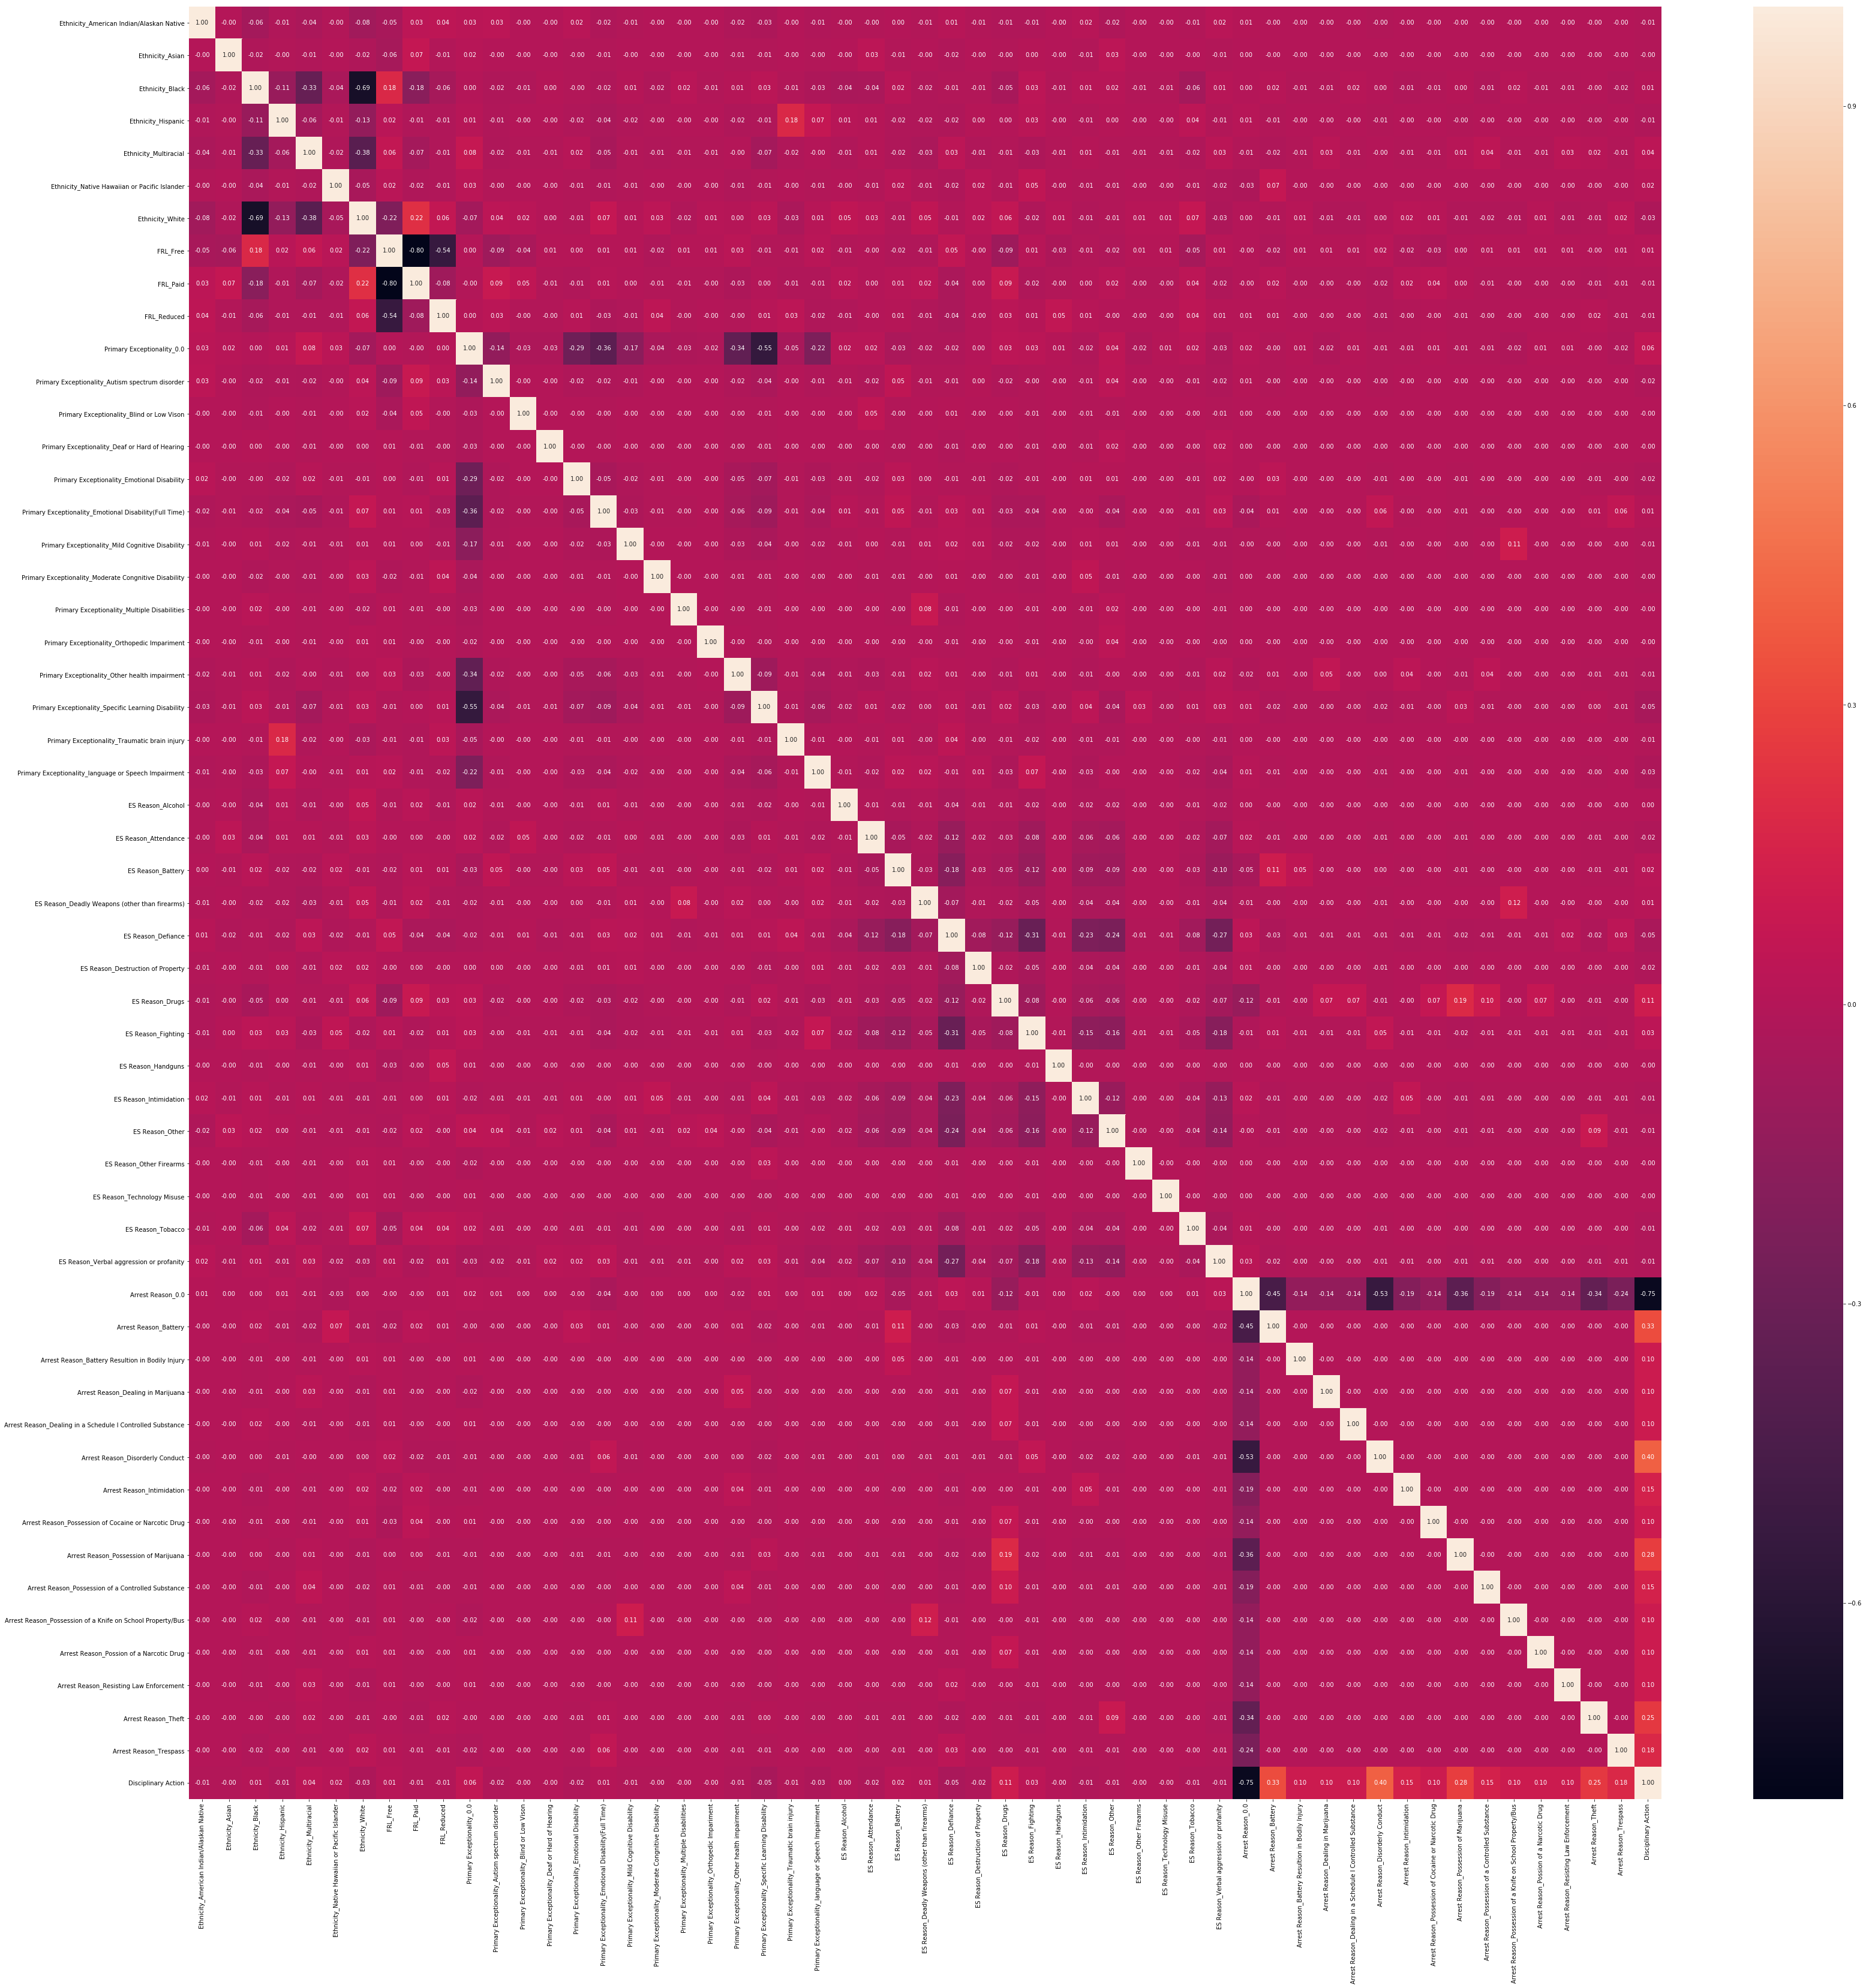

In [12]:
associations(evscDataC, nominal_columns=None, mark_columns=False, theil_u=False, plot=True, return_results = False)

In [68]:
#Prepare data for modeling
#get dummy variables for nominal data
evscEncodedData = pd.get_dummies(Evansville_Dicipline_Data[['School Name', 'Grade','Gender','Ethnicity','FRL', 'Primary Exceptionality','ES Reason', 'Arrest Reason']],drop_first=True)

#Introduce Arrest Made column that will serve as a target variable
def arrest_made(row):
    if row['Arrest Reason']!=0:
        return 1
    return 0
#get separate dataframe of dummy variables for Discipline type
evscDisType = pd.get_dummies(Evansville_Dicipline_Data[['ES Type']])

evscDisType['Arrest Made']=Evansville_Dicipline_Data.apply(lambda row: arrest_made(row), axis=1)


evscData = evscEncodedData

#Create Target Vector(Disciplinary Action) from existing variables concerning type of event
def disciplinary_action(row):
    if row['ES Type_Event involving Arrest, Bullying, Gang Not Involving Susp/Expul']==1:
        return 2 #Event involving Arrest, Bullying, Gang Not Involving Susp/Expul
    if row['ES Type_Expulsion']==1:
        return 1 #Expulsion
    if row['ES Type_Out-Of-School Susp']+row['Arrest Made']>1:
        return 2 #Arrest
    if row['ES Type_Out-Of-School Susp']==1:
        return 0 #Out-Of-School Suspension
    return 0

evscDisType['Disciplinary Action'] = evscDisType.apply(lambda row: disciplinary_action(row), axis=1)
evscData['Disciplinary Action'] = pd.DataFrame(evscDisType['Disciplinary Action'])
#Evansville_Dicipline_Data = Evansville_Dicipline_Data.drop(['ES Type_Event involving Arrest, Bullying, Gang Not Involving Susp/Expul', 'ES Type_Expulsion', 'ES Type_Out-Of-School Susp', 'Arrest Made', 'Gender_F'], axis=1)
newColNames = list(evscData.columns)

#list(evscData.columns)
evscData['Disciplinary Action'] = evscData['Disciplinary Action']. replace({0:"Suspension",1:"Expulsion", 2:"Arrest"})
evscData['Disciplinary Action'].value_counts()#['Disciplinary Action'].value_counts()

#evscData

Suspension    6022
Expulsion      158
Arrest          52
Name: Disciplinary Action, dtype: int64

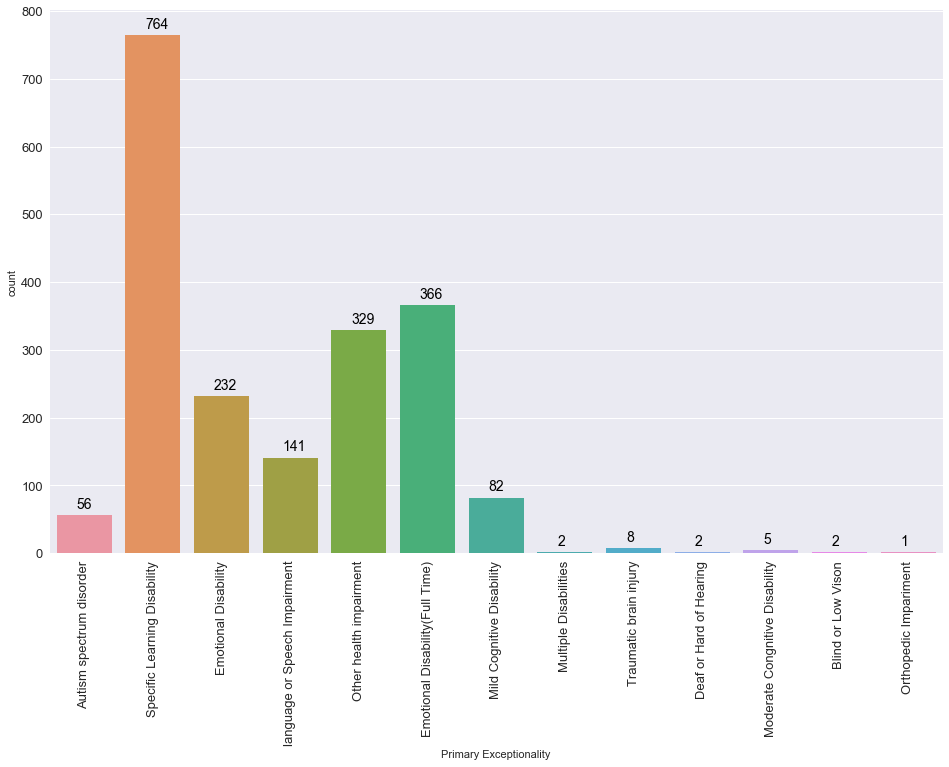

In [96]:
vBarChart(Evansville_Dicipline_Data, None, 'Primary Exceptionality', (-35, 0))


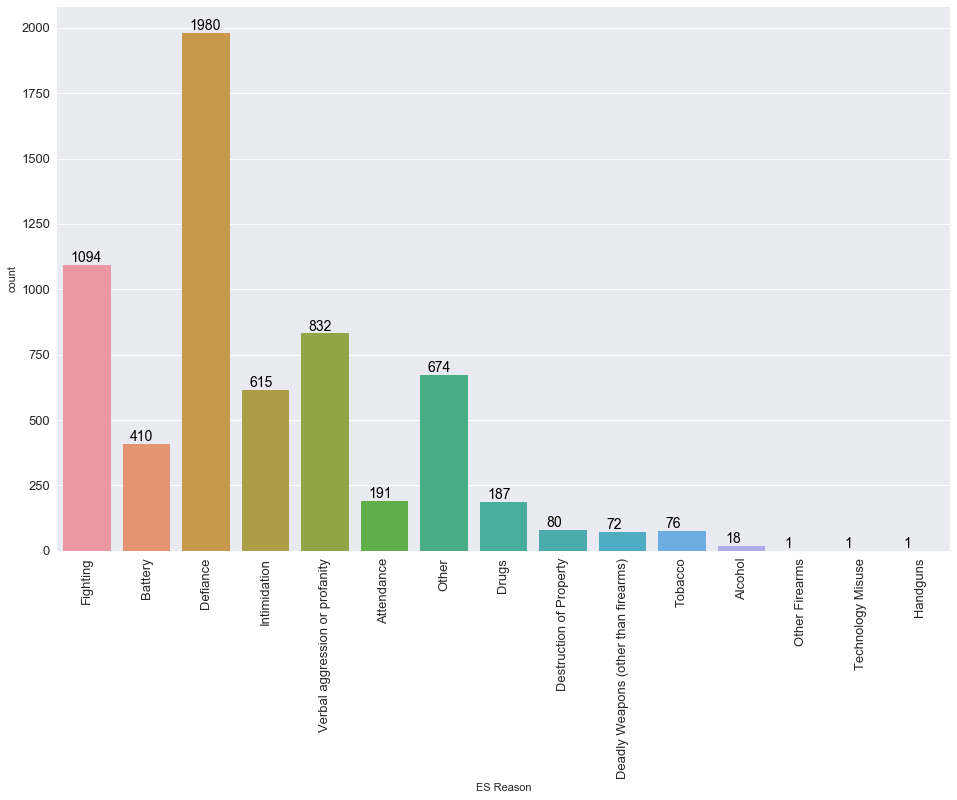

In [97]:
vBarChart(Evansville_Dicipline_Data, None, 'ES Reason', (-40,0))


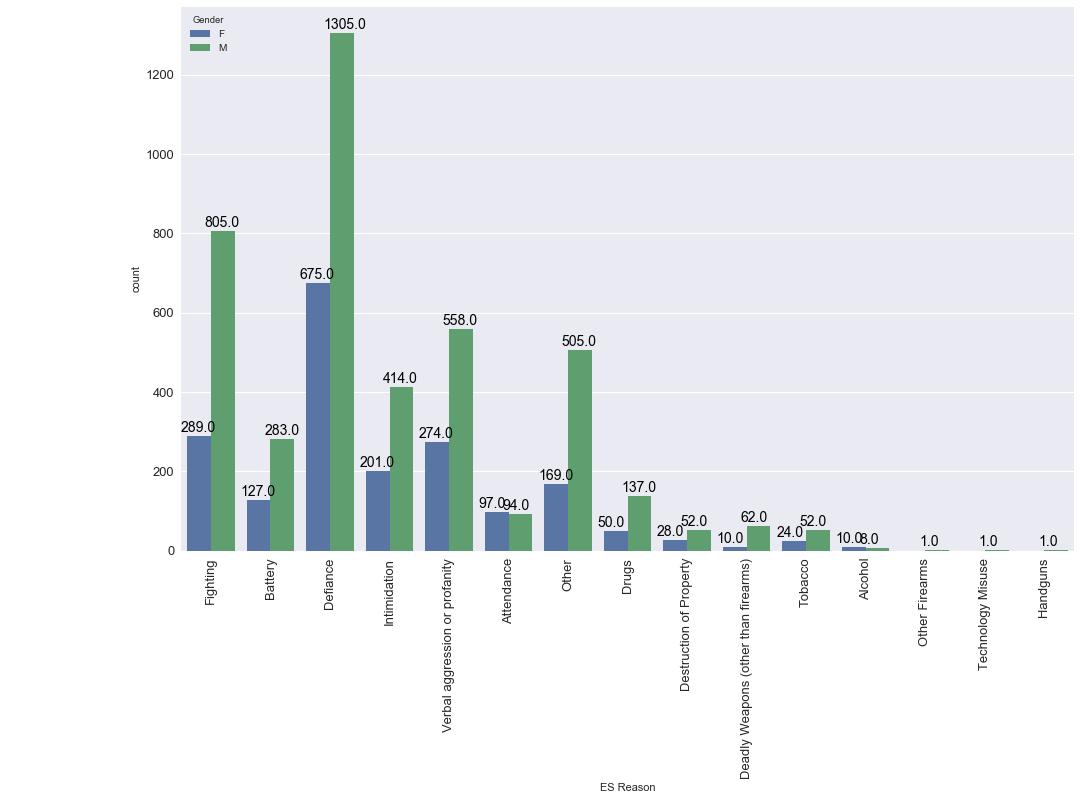

In [98]:
vBarChart(Evansville_Dicipline_Data, 'Gender', 'ES Reason',(-30, 0))


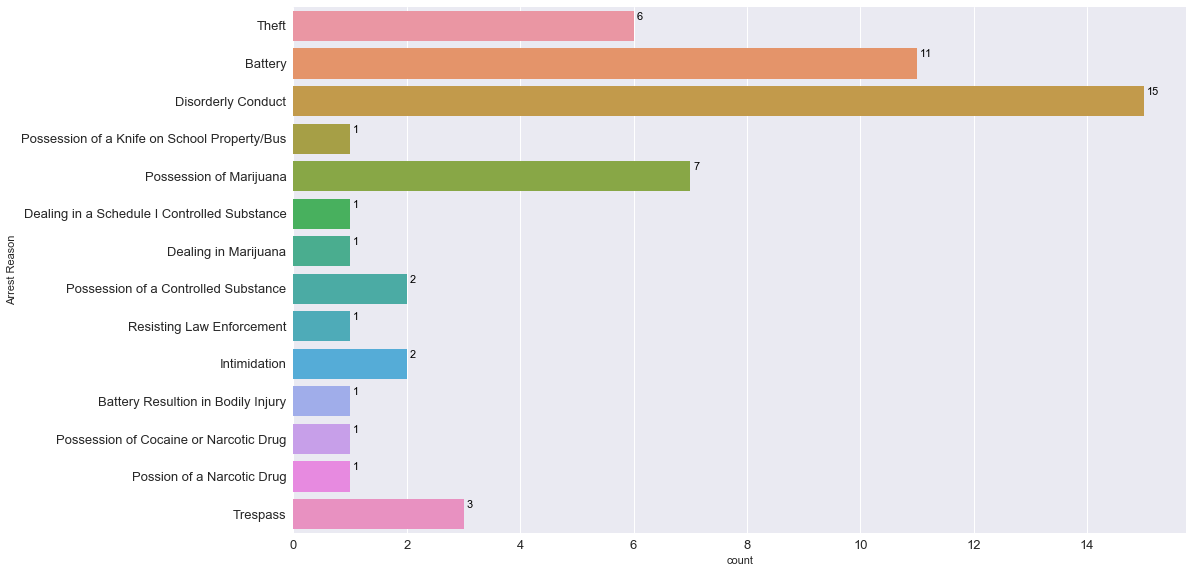

In [99]:
hBarChart(Evansville_Dicipline_Data, 'Arrest Reason')


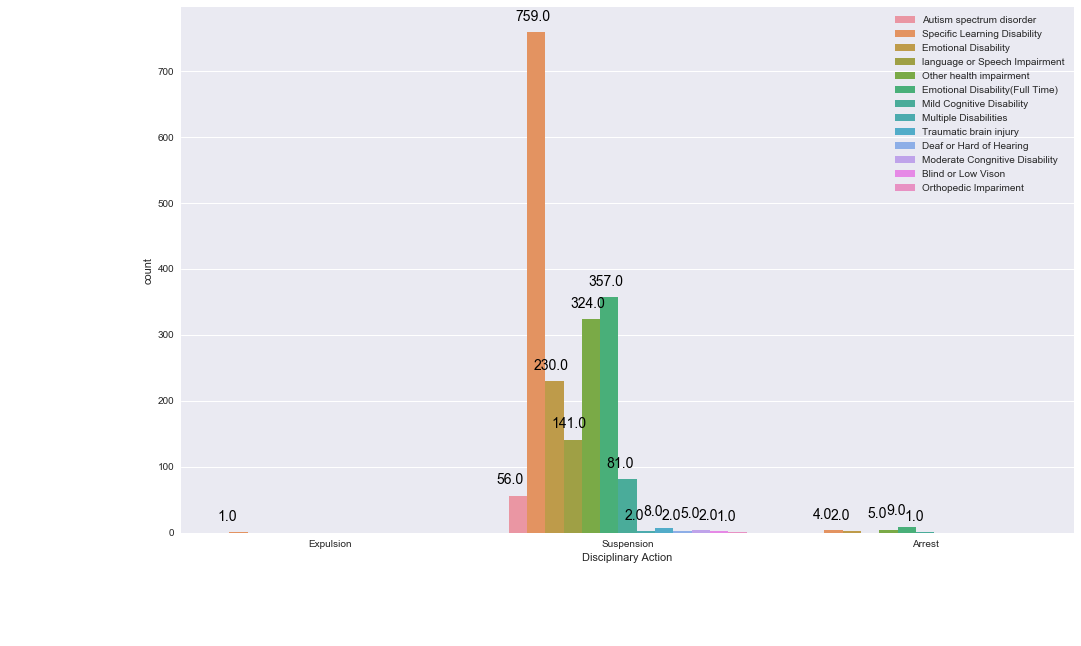

In [100]:
OtherVsDis('Primary Exceptionality',1)


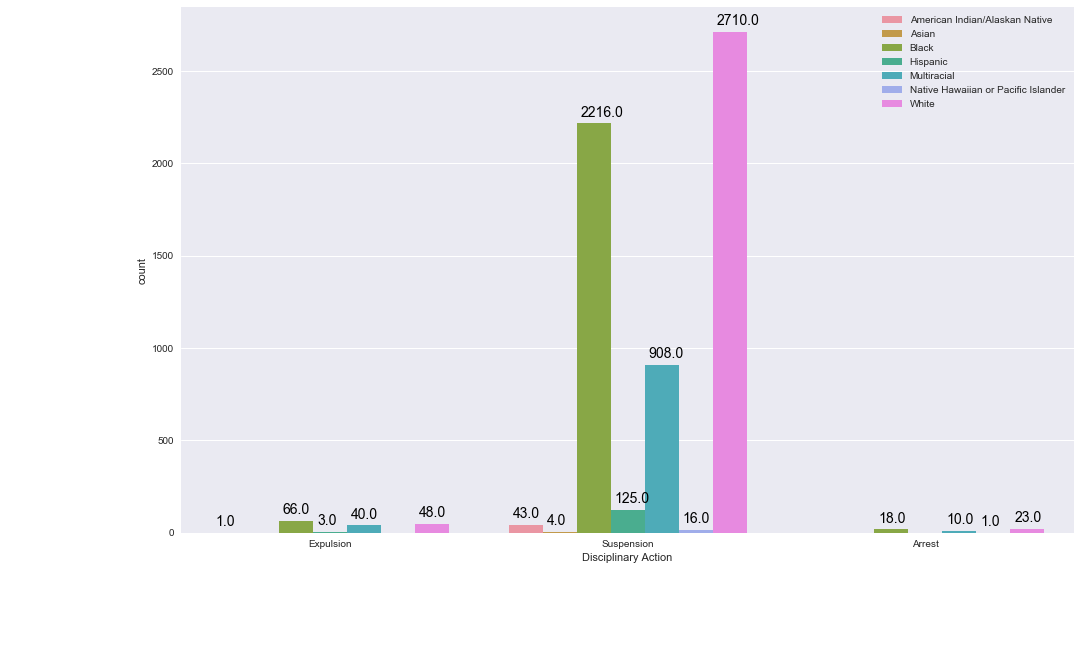

In [101]:
OtherVsDis('Ethnicity',0)


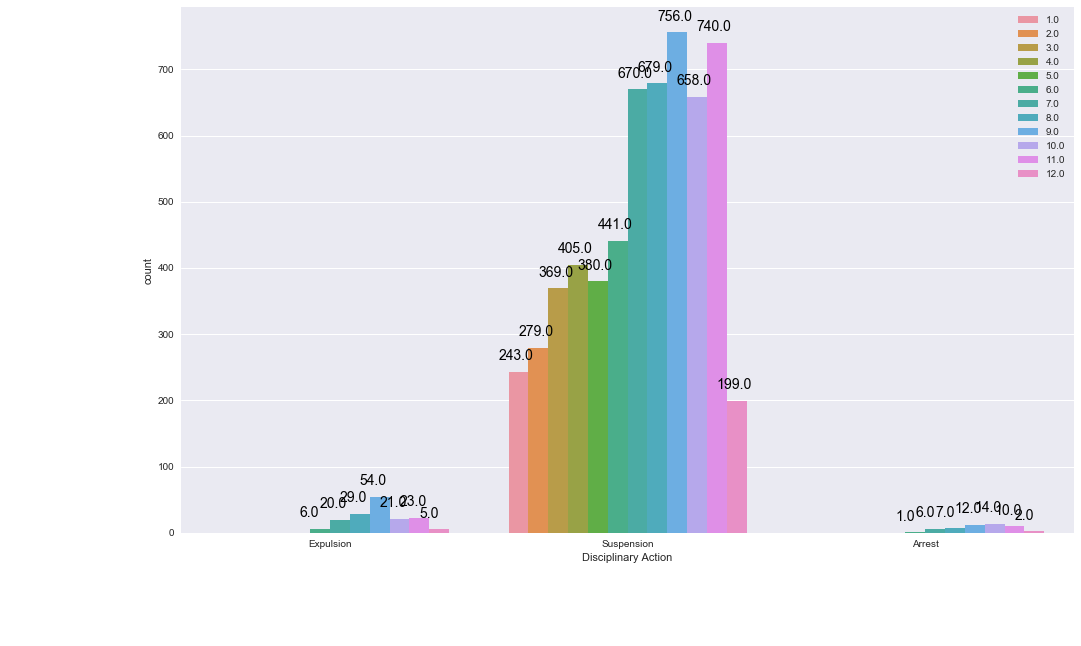

In [102]:
OtherVsDis('Grade',0)


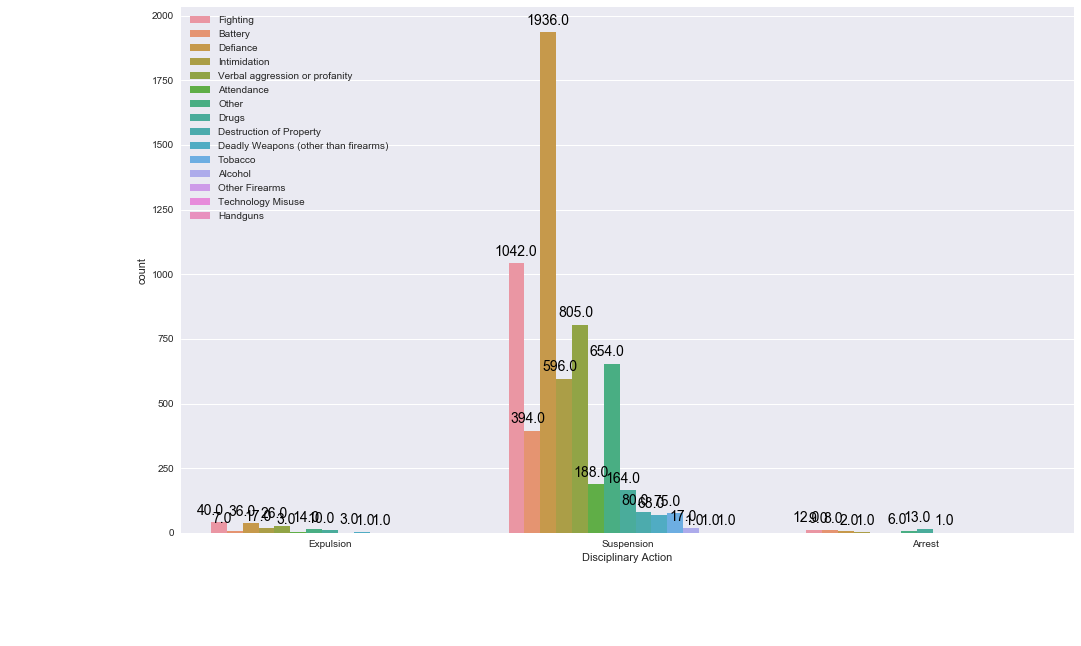

In [103]:
OtherVsDis('ES Reason',0)


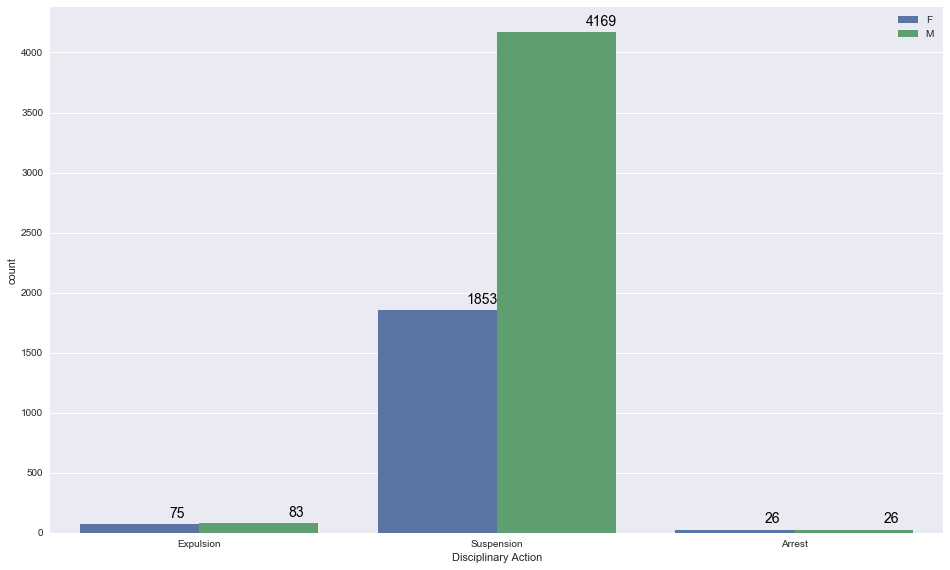

In [104]:
OtherVsDis('Gender',0)


In [79]:
from sklearn.model_selection import train_test_split
X = evscData.drop('Disciplinary Action', axis=1)
y = evscData['Disciplinary Action']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [80]:
len(X_train.index)

4985

In [27]:
##Synthesize data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_trainRO, y_trainRO = ros.fit_sample(X_train,y_train)
from collections import Counter
print(sorted(Counter(y_trainRO).items()))
#np.unique(y_trainRO, return_counts=True)

[('Arrest', 4814), ('Expulsion', 4814), ('Suspension', 4814)]


In [28]:
##Synthesize data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_trainSM, y_trainSM =sm.fit_sample(X_train,y_train)
print(sorted(Counter(y_trainSM).items()))
#clf_smote = LinearSVC().fit(X_resampledSM, y_resampledSM)


[('Arrest', 4814), ('Expulsion', 4814), ('Suspension', 4814)]


In [29]:
##Synthesize data
from imblearn.over_sampling import ADASYN
X_trainAD, y_trainAD = ADASYN().fit_sample(X_train, y_train)
print(sorted(Counter(y_trainAD).items()))


[('Arrest', 4806), ('Expulsion', 4829), ('Suspension', 4814)]


In [30]:
##LOGISTIC REGRESSION##

accuracy score: 0.7530072173215717
precision score: 0.655717426123499
recall score: 0.8457444199166053
f1 score: 0.6311065707069714


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



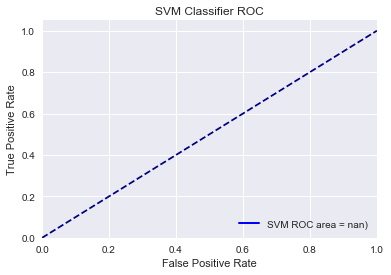

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import roc_auc
randOvS_LG = LogisticRegression(solver='liblinear', multi_class='auto', class_weight='balanced').fit(X_trainRO, y_trainRO)
randOvS_pred_LG = randOvS_LG.predict(X_test)
rovAS_LG = accuracy_score(y_test, randOvS_pred_LG)
print("accuracy score: " + str(rovAS_LG))
rovPrecision_LG = precision_score(y_test, randOvS_pred_LG, average='macro')
print("precision score: "+ str(rovPrecision_LG))
rovRecall_LG = recall_score(y_test, randOvS_pred_LG, average ='macro')
print("recall score: "+ str(rovRecall_LG))
rovF1_LG = f1_score(y_test, randOvS_pred_LG, average='macro')
print("f1 score: "+ str(rovF1_LG))

randOvS_prob_LG = randOvS_LG.predict_proba(X_test)
fpr_rLG, tpr_rLG, thresholds = roc_curve(y_test,randOvS_prob_LG[:,1], pos_label=2)
roc_auc_rLG = auc(fpr_rLG, tpr_rLG)
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr_rLG, tpr_rLG, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_rLG)
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
smote_LG = LogisticRegression(solver='liblinear', multi_class='auto', class_weight='balanced').fit(X_trainSM, y_trainSM)
smote_pred_LG = smote_LG.predict(X_test)
smoteAS_LG = accuracy_score(y_test, smote_pred_LG)
print("accuracy score: " + str(rovAS_LG))
smotePrecision_LG = precision_score(y_test, smote_pred_LG, average='macro')
print("precision score: "+ str(smotePrecision_LG))
smoteRecall_LG = recall_score(y_test, smote_pred_LG, average ='macro')
print("recall score: "+ str(smoteRecall_LG))
smoteF1_LG = f1_score(y_test, smote_pred_LG, average='macro')
print("f1 score: "+ str(smoteF1_LG))


accuracy score: 0.7530072173215717
precision score: 0.6566158483611438
recall score: 0.8415317635516311
f1 score: 0.6373105152528912


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
adasyn_LG = LogisticRegression(solver='liblinear', multi_class='auto', class_weight='balanced').fit(X_trainAD, y_trainAD)
adasyn_pred_LG = adasyn_LG.predict(X_test)
adasynAS_LG = accuracy_score(y_test, adasyn_pred_LG)
print("accuracy score: " + str(adasynAS_LG))
adasynPrecision_LG = precision_score(y_test, adasyn_pred_LG, average='macro')
print("precision score: "+ str(adasynPrecision_LG))
adasynRecall_LG = recall_score(y_test, adasyn_pred_LG, average ='macro')
print("recall score: "+ str(adasynRecall_LG))
adasynF1_LG = f1_score(y_test, adasyn_pred_LG, average='macro')
print("f1 score: "+ str(adasynF1_LG))


accuracy score: 0.656776263031275
precision score: 0.4928217257611263
recall score: 0.8126318371351484
f1 score: 0.49068105507931187


In [34]:
##KNeighborsClassifier

In [35]:
#Random Over-Sampling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
randOvS_KN = KNeighborsClassifier(n_neighbors=1).fit(X_trainRO, y_trainRO)
randOvS_pred_KN = randOvS_KN.predict(X_test)
rovAS_KN = accuracy_score(y_test, randOvS_pred_KN)
print("accuracy score: " + str(rovAS_KN))
rovPrecision_KN = precision_score(y_test, randOvS_pred_KN, average='macro')
print("precision score: "+ str(rovPrecision_KN))
rovRecall_KN = recall_score(y_test, randOvS_pred_KN, average ='macro')
print("recall score: "+ str(rovRecall_KN))
rovF1_KN = f1_score(y_test, randOvS_pred_KN, average='macro')
print("f1 score: "+ str(rovF1_KN))


accuracy score: 0.9021651964715317
precision score: 0.7035644411836636
recall score: 0.5832413539367182
f1 score: 0.5510844748858448


In [36]:
#SMOTE Over-Sampling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
smote_KN = KNeighborsClassifier(n_neighbors=1).fit(X_trainSM, y_trainSM)
smote_pred_KN = smote_KN.predict(X_test)
smoteAS_KN = accuracy_score(y_test, smote_pred_KN)
print("accuracy score: " + str(smoteAS_KN))
smotePrecision_KN = precision_score(y_test, smote_pred_KN, average='macro')
print("precision score: "+ str(smotePrecision_KN))
smoteRecall_KN = recall_score(y_test, smote_pred_KN, average ='macro')
print("recall score: "+ str(smoteRecall_KN))
smoteF1_KN = f1_score(y_test, smote_pred_KN, average='macro')
print("f1 score: "+ str(smoteF1_KN))


accuracy score: 0.9350441058540497
precision score: 0.5024368108071281
recall score: 0.5295437821927887
f1 score: 0.5078604104223979


In [37]:
#ADASYN Over-Sampling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
adasyn_KN = KNeighborsClassifier(n_neighbors=1).fit(X_trainAD, y_trainAD)
adasyn_pred_KN = adasyn_KN.predict(X_test)
adasynAS_KN = accuracy_score(y_test, adasyn_pred_KN)
print("accuracy score: " + str(adasynAS_KN))
adasynPrecision_KN = precision_score(y_test, adasyn_pred_KN, average='macro')
print("precision score: "+ str(adasynPrecision_KN))
adasynRecall_KN = recall_score(y_test, adasyn_pred_KN, average ='macro')
print("recall score: "+ str(adasynRecall_KN))
adasynF1_KN = f1_score(y_test, adasyn_pred_KN, average='macro')
print("f1 score: "+ str(adasynF1_KN))


accuracy score: 0.884522854851644
precision score: 0.3942608349243096
recall score: 0.48623375030659793
f1 score: 0.41092745595428065


In [38]:
#LinearSVC

In [39]:
#Random Over-Sampling
from sklearn.svm import LinearSVC
#clf = LinearSVC()
#clf.fit(X_resampledRO, y_resampledRO)
#y_pred = clf.predict(X_test)
#print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
randOvS_SVC = LinearSVC(C=1, max_iter=4500).fit(X_trainRO, y_trainRO)
randOvS_pred_SVC = randOvS_SVC.predict(X_test)
rovAS_SVC = accuracy_score(y_test, randOvS_pred_SVC)
print("accuracy score: " + str(rovAS_SVC))
rovPrecision_SVC = precision_score(y_test, randOvS_pred_SVC, average='macro')
print("precision score: "+ str(rovPrecision_SVC))
rovRecall_SVC = recall_score(y_test, randOvS_pred_SVC, average ='macro')
print("recall score: "+ str(rovRecall_SVC))
rovF1_SVC = f1_score(y_test, randOvS_pred_SVC, average='macro')
print("f1 score: "+ str(rovF1_SVC))


accuracy score: 0.7554129911788292
precision score: 0.6929233886680696
recall score: 0.8465722344861417
f1 score: 0.649354221423222


In [40]:
#SMOTE Over-Sampling
from sklearn.svm import LinearSVC
#clf = LinearSVC(max_iter=1000)
#clf.fit(X_resampledSM, y_resampledSM)
#y_pred = clf.predict(X_test)
#print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
smote_SVC = LinearSVC(max_iter=5000).fit(X_trainSM, y_trainSM)
smote_pred_SVC = smote_SVC.predict(X_test)
smoteAS_SVC = accuracy_score(y_test, smote_pred_SVC)
print("accuracy score: " + str(smoteAS_SVC))
smotePrecision_SVC = precision_score(y_test, smote_pred_SVC, average='macro')
print("precision score: "+ str(smotePrecision_SVC))
smoteRecall_SVC = recall_score(y_test, smote_pred_SVC, average ='macro')
print("recall score: "+ str(smoteRecall_SVC))
smoteF1_SVC = f1_score(y_test, smote_pred_SVC, average='macro')
print("f1 score: "+ str(smoteF1_SVC))


accuracy score: 0.7746591820368885
precision score: 0.6948459048691248
recall score: 0.853194751042433
f1 score: 0.6572428418669783


In [41]:
from sklearn.svm import LinearSVC
#clf = LinearSVC(max_iter=2000)
#clf.fit(X_resampledAD, y_resampledAD)
#y_pred = clf.predict(X_test)
#print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
adasyn_SVC = LinearSVC(max_iter=5500).fit(X_trainAD, y_trainAD)
adasyn_pred_SVC = adasyn_SVC.predict(X_test)
adasynAS_SVC = accuracy_score(y_test, adasyn_pred_SVC)
print("accuracy score: " + str(adasynAS_SVC))
adasynPrecision_SVC = precision_score(y_test, adasyn_pred_SVC, average='macro')
print("precision score: "+ str(adasynPrecision_SVC))
adasynRecall_SVC = recall_score(y_test, adasyn_pred_SVC, average ='macro')
print("recall score: "+ str(adasynRecall_SVC))
adasynF1_SVC = f1_score(y_test, adasyn_pred_SVC, average='macro')
print("f1 score: "+ str(adasynF1_SVC))


accuracy score: 0.6784282277465918
precision score: 0.6866146360264006
recall score: 0.8200821682609761
f1 score: 0.6206779508577379


In [110]:
ROS_results = pd.DataFrame([['Random Over-Sampling', 'Accuaracy Score', 'Precision score', 'Recall', 'F1 Score'],['Logistic Regression', str(rovAS_LG), str(rovPrecision_LG), str(rovRecall_LG), str(rovF1_LG)],['KNNeighbor', str(rovAS_KN), str(rovPrecision_KN), str(rovRecall_KN), str(rovF1_KN)],['Linear SVC', str(rovAS_SVC), str(rovPrecision_SVC), str(rovRecall_SVC), str(rovF1_SVC)]])
ROS_results.to_excel(r'/Users/manoahf/Desktop/Capstone/ROSresults.xlsx')


In [111]:
SMOTE_results = pd.DataFrame([['SMOTE', 'Accuaracy Score', 'Precision score', 'Recall', 'F1 Score'],['Logistic Regression', str(smoteAS_LG), str(smotePrecision_LG), str(smoteRecall_LG), str(smoteF1_LG)],['KNNeighbor', str(smoteAS_KN), str(smotePrecision_KN), str(smoteRecall_KN), str(smoteF1_KN)],['Linear SVC', str(smoteAS_SVC), str(smotePrecision_SVC), str(smoteRecall_SVC), str(smoteF1_SVC)]])
SMOTE_results.to_excel(r'/Users/manoahf/Desktop/Capstone/SMOTEresults.xlsx')


In [112]:
ADASYN_results = pd.DataFrame([['ADASYN', 'Accuaracy Score', 'Precision score', 'Recall', 'F1 Score'],['Logistic Regression', str(adasynAS_LG), str(adasynPrecision_LG), str(adasynRecall_LG), str(adasynF1_LG)],['KNNeighbor', str(adasynAS_KN), str(adasynPrecision_KN), str(adasynRecall_KN), str(adasynF1_KN)],['Linear SVC', str(adasynAS_SVC), str(adasynPrecision_SVC), str(adasynRecall_SVC), str(adasynF1_SVC)]])
ADASYN_results.to_excel(r'/Users/manoahf/Desktop/Capstone/ADASYNresults.xlsx')
